<a href="https://colab.research.google.com/github/MelonieNimasha/Future-Frame-Prediction/blob/main/stable_diffusion_img2img_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image-to-Image Stable Diffusion Model Inferencing

 Clone Stable Diffusion Repo to Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/My Drive/MScProject

/content/gdrive/My Drive/MScProject


In [3]:
!ls

output_frames  stable-diffusion  video_frames


In [4]:
# !git clone https://github.com/runwayml/stable-diffusion.git

In [ ]:
cd stable-diffusion

Download the Latest Stable Diffusion Checkpoint

In [6]:
# mkdir -p models/ldm/stable-diffusion-v1

In [43]:
!wget https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned.ckpt -O models/ldm/stable-diffusion-v1/model.ckpt

--2023-07-14 22:09:15--  https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned.ckpt
Resolving huggingface.co (huggingface.co)... 13.224.249.43, 13.224.249.44, 13.224.249.10, ...
Connecting to huggingface.co (huggingface.co)|13.224.249.43|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/6b/20/6b201da5f0f5c60524535ebb7deac2eef68605655d3bbacfee9cce0087f3b3f5/e1441589a6f3c5a53f5f54d0975a18a7feb7cdf0b0dee276dfc3331ae376a053?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27v1-5-pruned.ckpt%3B+filename%3D%22v1-5-pruned.ckpt%22%3B&Expires=1689627924&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY4OTYyNzkyNH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy82Yi8yMC82YjIwMWRhNWYwZjVjNjA1MjQ1MzVlYmI3ZGVhYzJlZWY2ODYwNTY1NWQzYmJhY2ZlZTljY2UwMDg3ZjNiM2Y1L2UxNDQxNTg5YTZmM2M1YTUzZjVmNTRkMDk3NWExOGE3ZmViN2NkZjBiMGRlZTI3NmRmYzMzMzFhZTM3

Install Packages

In [8]:
!pip install fire
!pip install gradio
!pip install einops
!pip install omegaconf
!pip install pytorch_lightning
!pip install kornia
!pip install transformers
!pip install -e git+https://github.com/CompVis/taming-transformers.git@master#egg=taming-transformers
!pip install -e git+https://github.com/openai/CLIP.git@main#egg=clip
!pip install -e git+https://github.com/justinpinkney/nomi.git@e9ded23b7e2269cc64d39683e1bf3c0319f552ab#egg=nomi
!pip install -e .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=7d8f74135c1239feee6d818bb8dc0f9ec0b810c781f5913dde446fe0ac869e11
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.1 MB/s eta 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.4/722.4 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.4/653.4 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00
Obtaining taming-transformers from git+https://github.com/CompVis/taming-transformers.git@master#egg=taming-transformers
  Updating ./src/taming-transformers clone (to revision master)
  Running command git fetch -q --tags
  Running command git reset --hard -q 3ba01b241669f5ade541ce990f7650a3b8f65318
  Preparing metadata (setup.py) ... done
  Running setup.py develop for taming-transformers
Obtaining clip from git+https://github.com/openai/CLIP.git@main#egg=clip
  Updating ./src/clip clone (to revision main)
  Runn

In [9]:
!pip install taming-transformers

In [10]:
!pip install --upgrade pytorch-lightning

In [11]:
!pip install torch torchvision
!pip install clip

In [16]:
!pip install timm==0.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 11.0 MB/s eta 0:00:00


Import Libraries

In [12]:
from contextlib import nullcontext
from functools import partial

import fire
import gradio as gr
import numpy as np
import torch
from einops import rearrange
from ldm.models.diffusion.ddim import DDIMSampler
from ldm.models.diffusion.plms import PLMSSampler
from omegaconf import OmegaConf
from PIL import Image
from torch import autocast
from torchvision import transforms


In [13]:
from torchvision.transforms import ToPILImage
import PIL

In [14]:
import importlib

In [15]:
from ldm.util import instantiate_from_config

Run the Image-to-Image Script

In [58]:
!python scripts/img2img.py --prompt "photo" --init-img "data/input/1.png" --strength 0.8 --strength 0.001 --n_samples 1

Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 840000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.22.layer_norm2.weight', 'vision_model.encoder.layers.16.layer_norm2.bias', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.4.mlp.fc1.bias', 'vision_model.embeddings.position_embedding.weight', 'vision_model.encoder.layers.12.layer_norm1.weight', 'vision_model.encoder.layers.0.mlp.fc2.bias', 'vision_model.pre_layrnorm.bias', 'vision_model.encoder.layers.16.mlp.fc1.weight', 'vision_model.encoder.layers.23.self_attn.out_proj.bias', 'vision_model.encoder.layers.14.se

Input

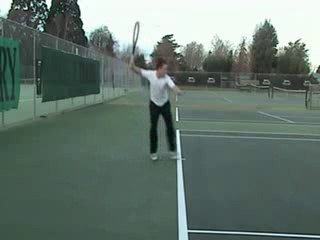

In [59]:
image = Image.open("data/input/1.png")  # Replace "path/to/image.jpg" with the actual path to your image

# Display the image
image.show()

Output

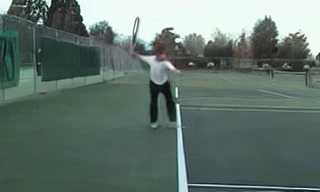

In [60]:
image = Image.open("outputs/img2img-samples/samples/00007.png")  # Replace "path/to/image.jpg" with the actual path to your image

# Display the image
image.show()